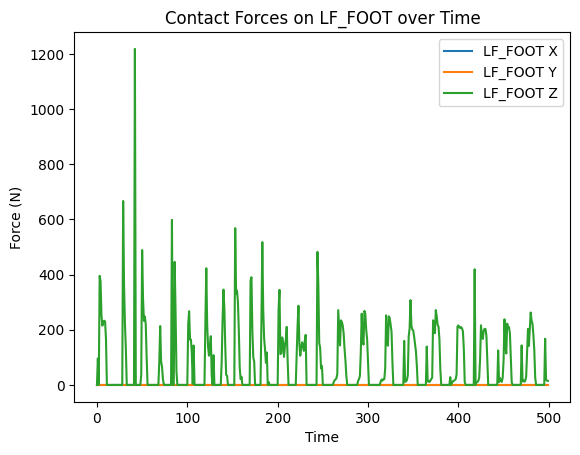

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-11-06_23-02-21/2024-11-11_22-29-22_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-11-07_21-57-49/2024-11-14_17-35-46_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-11-07_21-57-49/2024-11-16_17-41-24_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_15-46-20_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_16-01-06_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_16-55-32_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-12-23_data.csv"


### navigation
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-03_00-51-41/2024-12-03_16-01-59_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-03_00-51-41/2024-12-03_21-08-15_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-03_00-51-41/2024-12-03_21-09-49_data.csv"
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-03_22-40-12/2024-12-08_20-44-50_data.csv"
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-09_03-25-10/2024-12-09_13-23-20_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-09_04-47-12/2024-12-09_13-29-36_data.csv"


### locomotion
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-12-02_23-11-51/2024-12-03_22-01-08_data.csv"
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-12-02_23-11-51/2024-12-03_22-06-16_data.csv"
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-12-02_23-11-51/2024-12-09_13-55-54_data.csv"

### navigation base 
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-06_13-51-30/2024-12-09_23-58-42_data.csv"

path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2025-01-06_22-16-24/2025-01-12_23-35-23_data.csv"

# Load data from CSV
# data = pd.read_csv("logs/rsl_rl/anymal_d_flat/2024-11-06_23-02-21/2024-11-11_15-30-08_contact_forces.csv")  # or "contact_forces_ros.csv"
data = pd.read_csv(path)
# data = data.iloc[1200:1480]
# data = data.iloc[1180:1510]
# data = data.iloc[0:300]
data = data.iloc[0:500]
# Plot LF_FOOT force data over time
plt.plot(data["Time"], data["LF_FOOT_X"], label="LF_FOOT X")
plt.plot(data["Time"], data["LF_FOOT_Y"], label="LF_FOOT Y")
plt.plot(data["Time"], data["LF_FOOT_Z"], label="LF_FOOT Z")
plt.xlabel("Time")
plt.ylabel("Force (N)")
plt.title("Contact Forces on LF_FOOT over Time")
plt.legend()
plt.show()


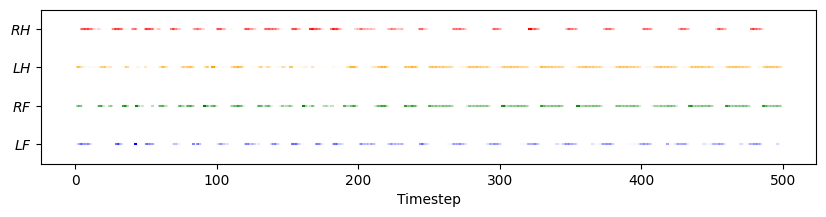

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV

# Extract time and contact data for each foot
time = data['Time']
contact_LF = data['LF_FOOT_Z'] > 0  # Contact if Z > 0
contact_RF = data['RF_FOOT_Z'] > 0
contact_LH = data['LH_FOOT_Z'] > 0
contact_RH = data['RH_FOOT_Z'] > 0

# Use the Z values as intensity for each foot
intensity_LF = data['LF_FOOT_Z']
intensity_RF = data['RF_FOOT_Z']
intensity_LH = data['LH_FOOT_Z']
intensity_RH = data['RH_FOOT_Z']

# Define colors for each leg
colors = {'LF': 'blue', 'RF': 'green', 'LH': 'orange', 'RH': 'red'}

# Create the plot
fig, ax = plt.subplots(figsize=(10, 2))

# Plot each foot's contact as bars with intensity-dependent thickness
for i, (contact, intensity, label, color) in enumerate(zip(
        [contact_LF, contact_RF, contact_LH, contact_RH],
        [intensity_LF, intensity_RF, intensity_LH, intensity_RH],
        ['LF', 'RF', 'LH', 'RH'],
        colors.values())):
    
    # Plot bars for contact phases with intensity-based thickness
    for j in range(len(time) - 1):
        if contact.iloc[j]:  # Only plot if there's contact
            alpha_value = min(intensity.iloc[j] / intensity.max(), 1)  # Normalize intensity for alpha
            ax.plot(time.iloc[j:j + 2], [i, i], color=color, alpha=alpha_value, label=label if j == 0 else "")

# Customize plot
ax.set_yticks(range(4))
ax.set_yticklabels([r'$LF$', r'$RF$', r'$LH$', r'$RH$'])
ax.set_xlabel("Timestep")
ax.set_ylim(-0.5, 3.5)
# ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

plt.show()


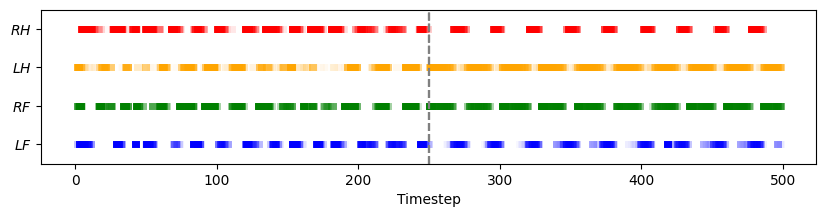

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV

# Extract time and contact data for each foot
time = data['Time']
contact_LF = data['LF_FOOT_Z'] > 0  # Contact if Z > 0
contact_RF = data['RF_FOOT_Z'] > 0
contact_LH = data['LH_FOOT_Z'] > 0
contact_RH = data['RH_FOOT_Z'] > 0

# Use the Z values as intensity for each foot
intensity_LF = data['LF_FOOT_Z']
intensity_RF = data['RF_FOOT_Z']
intensity_LH = data['LH_FOOT_Z']
intensity_RH = data['RH_FOOT_Z']

forces = [intensity_LF, intensity_RF, intensity_LH, intensity_RH]
labels = ['LF foot', 'RF foot', 'LH foot', 'RH foot']

# Define colors for each leg
colors = {'LF': 'blue', 'RF': 'green', 'LH': 'orange', 'RH': 'red'}

# Define the intensity cap
intensity_cap = 400

# Create the plot
fig, ax = plt.subplots(figsize=(10, 2))

# Plot each foot's contact as bars with intensity-dependent thickness
for i, (contact, intensity, label, color) in enumerate(zip(
        [contact_LF, contact_RF, contact_LH, contact_RH],
        [intensity_LF, intensity_RF, intensity_LH, intensity_RH],
        ['LF', 'RF', 'LH', 'RH'],
        colors.values())):
    
    # Plot bars for contact phases with intensity-based thickness
    for j in range(len(time) - 1):
        if contact.iloc[j]:  # Only plot if there's contact
            # Normalize intensity for alpha, with a maximum of 1 for values >= 300
            alpha_value = min(intensity.iloc[j] / intensity_cap, 1)
            ax.plot(time.iloc[j:j + 2], [i, i], color=color, linewidth=5, alpha=alpha_value, label=label if j == 0 else "")

    ax.axvline(x=250, color='gray', linestyle='--', label='Time 300')
    # ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# Customize plot
ax.set_yticks(range(4))
ax.set_yticklabels([r'$LF$', r'$RF$', r'$LH$', r'$RH$'])
ax.set_xlabel("Timestep")
ax.set_ylim(-0.5, 3.5)
# ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

plt.show()


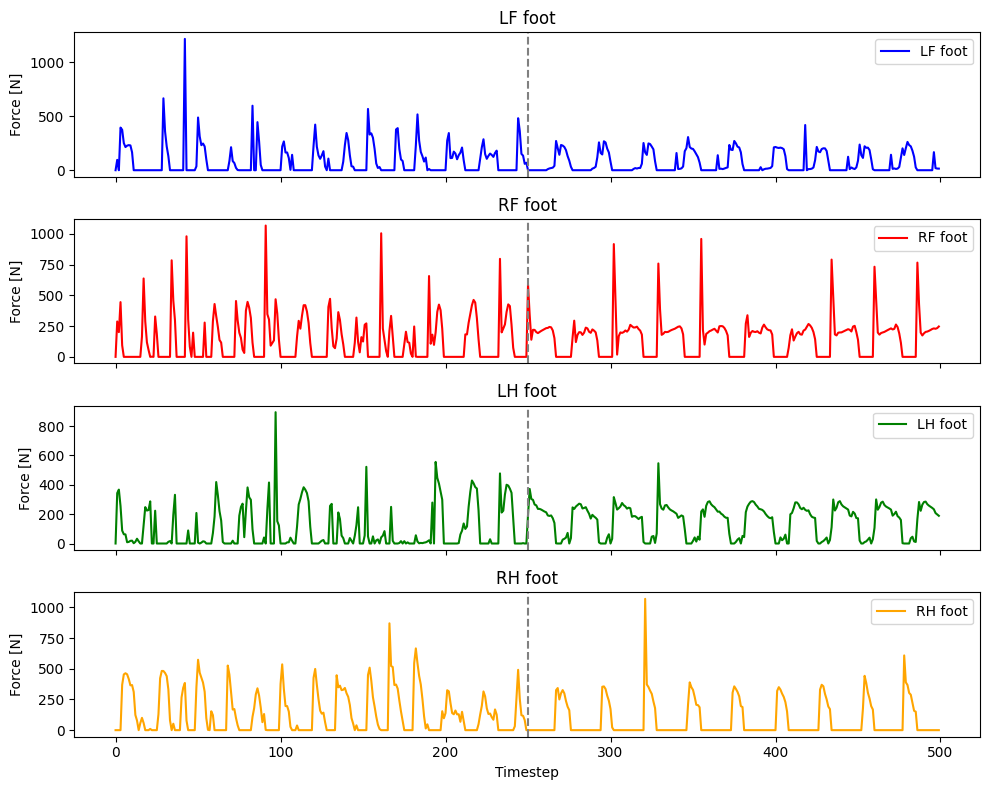

In [56]:
# Load data from CSV

# Extract time and force data for each foot
time = data['Time']
force_LF = data['LF_FOOT_Z']
force_RF = data['RF_FOOT_Z']
force_LH = data['LH_FOOT_Z']
force_RH = data['RH_FOOT_Z']

# Define colors and labels for each foot
forces = [force_LF, force_RF, force_LH, force_RH]
labels = ['LF foot', 'RF foot', 'LH foot', 'RH foot']
colors = ['blue', 'red', 'green', 'orange']

# Create subplots for each foot
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
    ax.plot(time, force, color=color, label=label)
    ax.set_ylabel("Force [N]")
    ax.set_title(label)
    ax.legend(loc="upper right")
    
    # Add vertical lines at time = 299, 300, 301
    ax.axvline(x=250, color='gray', linestyle='--', label='Time 300')
    # ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# Set x-axis label only for the bottom subplot
axs[-1].set_xlabel("Timestep")

# Adjust layout
plt.tight_layout()
plt.show()

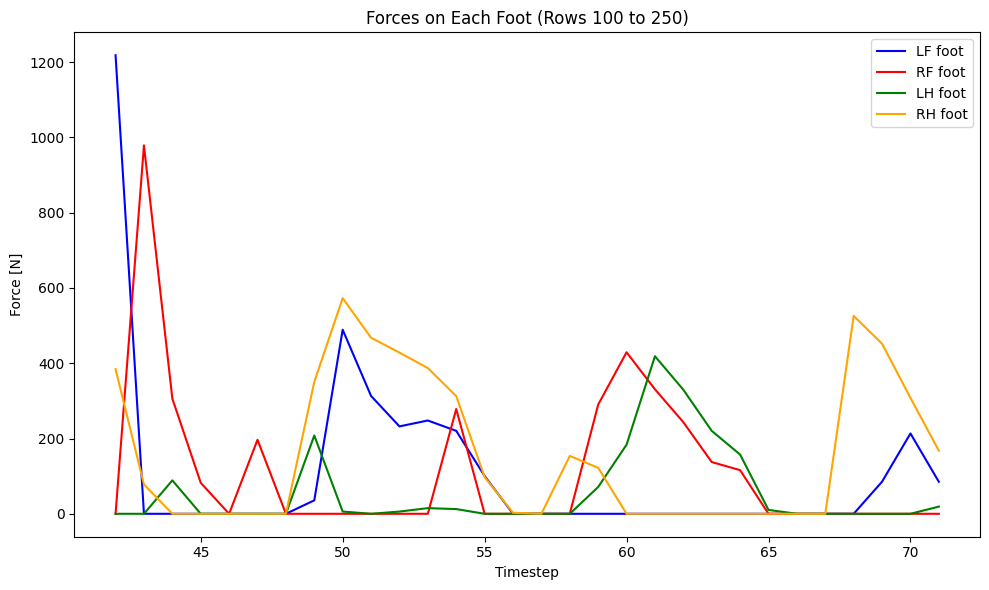

In [57]:
# Load data from CSV
# Select rows from 100 to 250 (inclusive for indices 100-249)
a = 42
b = 72
filtered_data = data.iloc[a:b]

# Extract relevant data
time = range(a, b)  # Create a time-like index for plotting
force_LF = filtered_data['LF_FOOT_Z']
force_RF = filtered_data['RF_FOOT_Z']
force_LH = filtered_data['LH_FOOT_Z']
force_RH = filtered_data['RH_FOOT_Z']

# Define colors and labels for each foot
forces = [force_LF, force_RF, force_LH, force_RH]
labels = ['LF foot', 'RF foot', 'LH foot', 'RH foot']
colors = ['blue', 'red', 'green', 'orange']

# Create a single plot
plt.figure(figsize=(10, 6))

for force, label, color in zip(forces, labels, colors):
    plt.plot(time, force, label=label, color=color)

# Add labels, title, and legend
plt.xlabel("Timestep")
plt.ylabel("Force [N]")
plt.title("Forces on Each Foot (Rows 100 to 250)")
plt.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


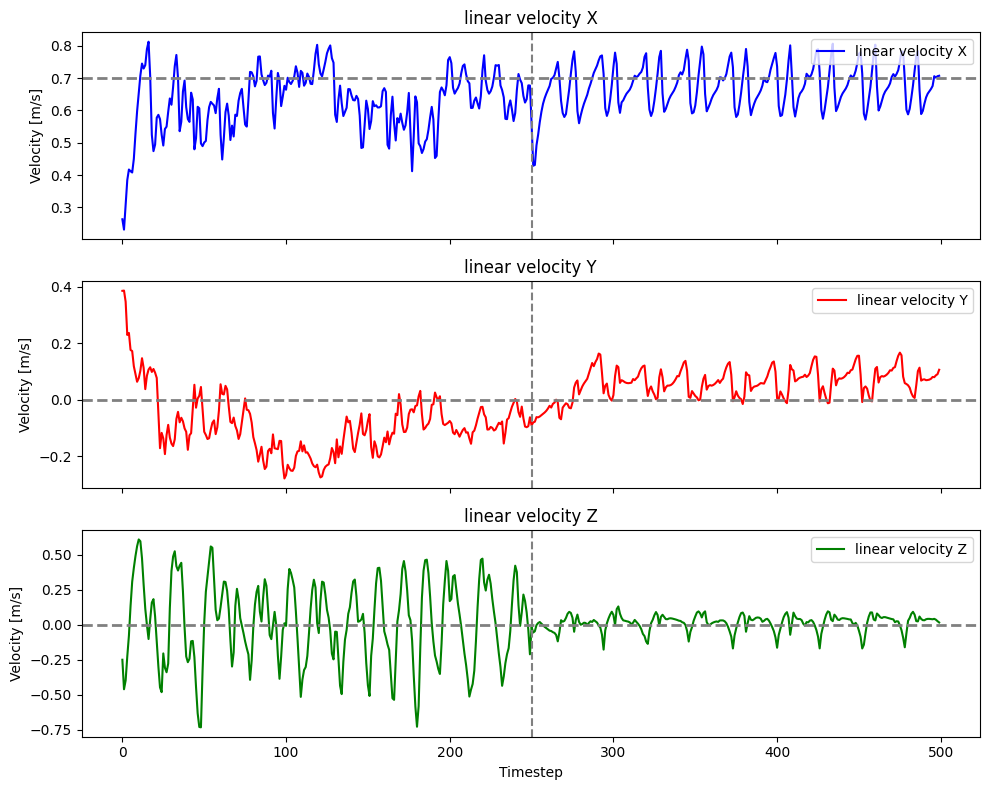

In [58]:
# Load data from CSV
# Extract time and force data for each foot
time = data['Time']
Base_lin_vel_X = data['Base_lin_vel_X']
Base_lin_vel_Y = data['Base_lin_vel_Y']
Base_lin_vel_Z = data['Base_lin_vel_Z']

# Define colors and labels for each foot
forces = [Base_lin_vel_X, Base_lin_vel_Y, Base_lin_vel_Z]
labels = ['linear velocity X', 'linear velocity Y', 'linear velocity Z']
colors = ['blue', 'red', 'green']

# Create subplots for each foot
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
    ax.plot(time, force, color=color, label=label)
    if i == 0:
        ax.axhline(y=0.7, color='gray', linestyle='--', linewidth=2)  # Line at y=0.9 in the first subplot
    elif i == 1:
        ax.axhline(y=0.0, color='gray', linestyle='--', linewidth=2)  # Line at y=0.5 in the second subplot
    if i == 2:
        ax.axhline(y=0.0, color='gray', linestyle='--', linewidth=2)  # Line at y=0.5 in the second subplot
    ax.set_ylabel("Velocity [m/s]")
    ax.set_title(label)
    ax.legend(loc="upper right")
    
    # Add vertical lines at time = 299, 300, 301
    ax.axvline(x=250, color='gray', linestyle='--', label='Time 300')
    # ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# Set x-axis label only for the bottom subplot
axs[-1].set_xlabel("Timestep")

# Adjust layout
plt.tight_layout()
plt.show()

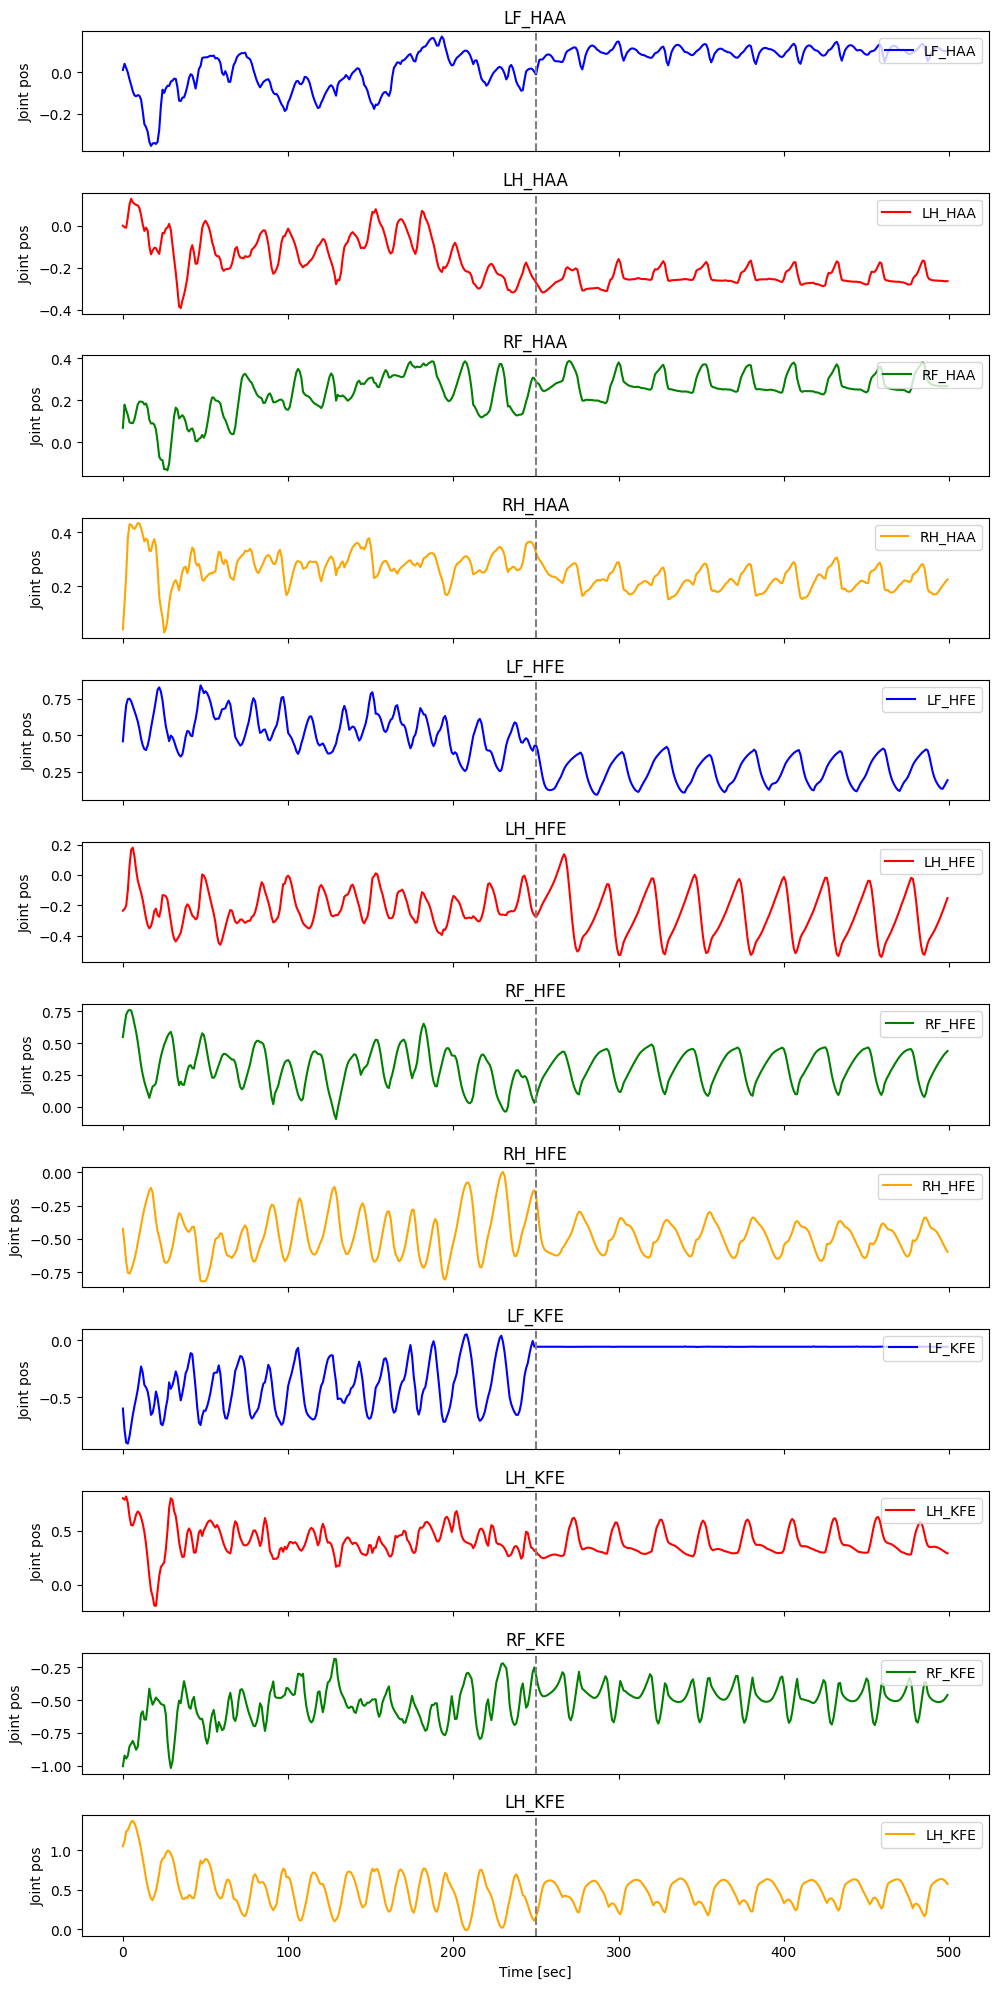

In [59]:
# Load data from CSV
# Extract time and force data for each foot
time = data['Time']
joint0_pos = data['joint0_pos']
joint1_pos = data['joint1_pos']
joint2_pos = data['joint2_pos']
joint3_pos = data['joint3_pos']
joint4_pos = data['joint4_pos']
joint5_pos = data['joint5_pos']
joint6_pos = data['joint6_pos']
joint7_pos = data['joint7_pos']
joint8_pos = data['joint8_pos']
joint9_pos = data['joint9_pos']
joint10_pos = data['joint10_pos']
joint11_pos = data['joint11_pos']

# Define colors and labels for each foot
forces = [joint0_pos, joint1_pos, joint2_pos, joint3_pos, joint4_pos, joint5_pos, joint6_pos, joint7_pos, joint8_pos, joint9_pos, joint10_pos, joint11_pos]
labels = ['LF_HAA', 'LH_HAA', 'RF_HAA', 'RH_HAA','LF_HFE','LH_HFE','RF_HFE','RH_HFE','LF_KFE','LH_KFE','RF_KFE','LH_KFE']
colors = ['blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange']

# Create subplots for each foot
fig, axs = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
    ax.plot(time, force, color=color, label=label)
    ax.set_ylabel("Joint pos")
    ax.set_title(label)
    ax.legend(loc="upper right")

    # Add vertical lines at time = 299, 300, 301
    ax.axvline(x=250, color='gray', linestyle='--', label='Time 300')
    # ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# Set x-axis label only for the bottom subplot
axs[-1].set_xlabel("Time [sec]")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# # Load data from CSV
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-32-04_data.csv"
# data = pd.read_csv(path)
# data = data.iloc[100:400]

# # Extract time and force data for each foot
# time = data['Time']
# joint0_pos = data['joint0_pos']
# joint1_pos = data['joint1_pos']
# joint2_pos = data['joint2_pos']
# joint3_pos = data['joint3_pos']
# joint4_pos = data['joint4_pos']
# joint5_pos = data['joint5_pos']
# joint6_pos = data['joint6_pos']
# joint7_pos = data['joint7_pos']
# joint8_pos = data['joint8_pos']
# joint9_pos = data['joint9_pos']
# joint10_pos = data['joint10_pos']
# joint11_pos = data['joint11_pos']

# # Define colors and labels for each foot
# forces = [joint0_pos, joint1_pos, joint2_pos, joint3_pos, joint4_pos, joint5_pos, joint6_pos, joint7_pos, joint8_pos, joint9_pos, joint10_pos, joint11_pos]
# labels = ['LF_HAA', 'LH_HAA', 'RF_HAA', 'RH_HAA','LF_HFE','LH_HFE','RF_HFE','RH_HFE','LF_KFE','LH_KFE','RF_KFE','LH_KFE']
# colors = ['blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange']

# # Create subplots for each foot
# fig, axs = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

# for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
#     ax.plot(time, force, color=color, label=label)
#     ax.set_ylabel("Joint pos")
#     ax.set_title(label)
#     ax.legend(loc="upper right")

# # Set x-axis label only for the bottom subplot
# axs[-1].set_xlabel("Time [sec]")

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [ ]:
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-17-54_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-22-09_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-32-04_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-34-58_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-38-53_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_17-41-15_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_18-04-26_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_18-13-56_data.csv"

# ## can use 
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_18-18-04_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_22-13-46_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-29_00-14-22_data.csv"

# # Load data from CSV
# data = pd.read_csv(path)

# # Extract time and force data for each foot
# time = data['Time']
# joint0_pos = data['joint0_pos']
# joint1_pos = data['joint1_pos']
# joint2_pos = data['joint2_pos']
# joint3_pos = data['joint3_pos']
# joint4_pos = data['joint4_pos']
# joint5_pos = data['joint5_pos']
# joint6_pos = data['joint6_pos']
# joint7_pos = data['joint7_pos']
# joint8_pos = data['joint8_pos']
# joint9_pos = data['joint9_pos']
# joint10_pos = data['joint10_pos']
# joint11_pos = data['joint11_pos']

# # Define colors and labels for each foot
# forces = [joint0_pos, joint1_pos, joint2_pos, joint3_pos, joint4_pos, joint5_pos, joint6_pos, joint7_pos, joint8_pos, joint9_pos, joint10_pos, joint11_pos]
# labels = ['LF_HAA', 'LH_HAA', 'RF_HAA', 'RH_HAA','LF_HFE','LH_HFE','RF_HFE','RH_HFE','LF_KFE','LH_KFE','RF_KFE','LH_KFE']
# colors = ['blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange']

# # Define x-ticks with intervals of 10 seconds
# time_ticks = np.arange(min(time), max(time), 50)

# # Create subplots for each foot
# fig, axs = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

# for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
#     ax.plot(time, force, color=color, label=label)
#     ax.set_ylabel("Joint pos")
#     ax.set_title(label)
#     ax.legend(loc="upper right")

#     # Add vertical lines at time = 299, 300, 301
#     ax.axvline(x=299, color='gray', linestyle='--', label='Time 299')
#     ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# # Set x-axis label only for the bottom subplot
# axs[-1].set_xlabel("Time [sec]")

# # Set x-ticks every 10 seconds
# for ax in axs:
#     ax.set_xticks(time_ticks)

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [ ]:
# ## can use 
# path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_18-18-04_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-28_22-13-46_data.csv"
# # path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-29_00-14-22_data.csv"


# # Load data from CSV
# data = pd.read_csv(path)
# data = data.iloc[250:350]

# # Extract time and force data for each foot
# time = data['Time']
# joint0_pos = data['joint0_pos']
# joint1_pos = data['joint1_pos']
# joint2_pos = data['joint2_pos']
# joint3_pos = data['joint3_pos']
# joint4_pos = data['joint4_pos']
# joint5_pos = data['joint5_pos']
# joint6_pos = data['joint6_pos']
# joint7_pos = data['joint7_pos']
# joint8_pos = data['joint8_pos']
# joint9_pos = data['joint9_pos']
# joint10_pos = data['joint10_pos']
# joint11_pos = data['joint11_pos']

# # Define colors and labels for each foot
# forces = [joint0_pos, joint1_pos, joint2_pos, joint3_pos, joint4_pos, joint5_pos, joint6_pos, joint7_pos, joint8_pos, joint9_pos, joint10_pos, joint11_pos]
# labels = ['LF_HAA', 'LH_HAA', 'RF_HAA', 'RH_HAA','LF_HFE','LH_HFE','RF_HFE','RH_HFE','LF_KFE','LH_KFE','RF_KFE','LH_KFE']
# colors = ['blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange']

# # Define x-ticks with intervals of 10 seconds
# time_ticks = np.arange(min(time), max(time), 50)

# # Create subplots for each foot
# fig, axs = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

# for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
#     ax.plot(time, force, color=color, label=label)
#     ax.set_ylabel("Joint pos")
#     ax.set_title(label)
#     ax.legend(loc="upper right")

#     # Add vertical lines at time = 299, 300, 301
#     ax.axvline(x=299, color='gray', linestyle='--', label='Time 299')
#     ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# # Set x-axis label only for the bottom subplot
# axs[-1].set_xlabel("Time [sec]")

# # Set x-ticks every 10 seconds
# for ax in axs:
#     ax.set_xticks(time_ticks)

# # Adjust layout
# plt.tight_layout()
# plt.show()

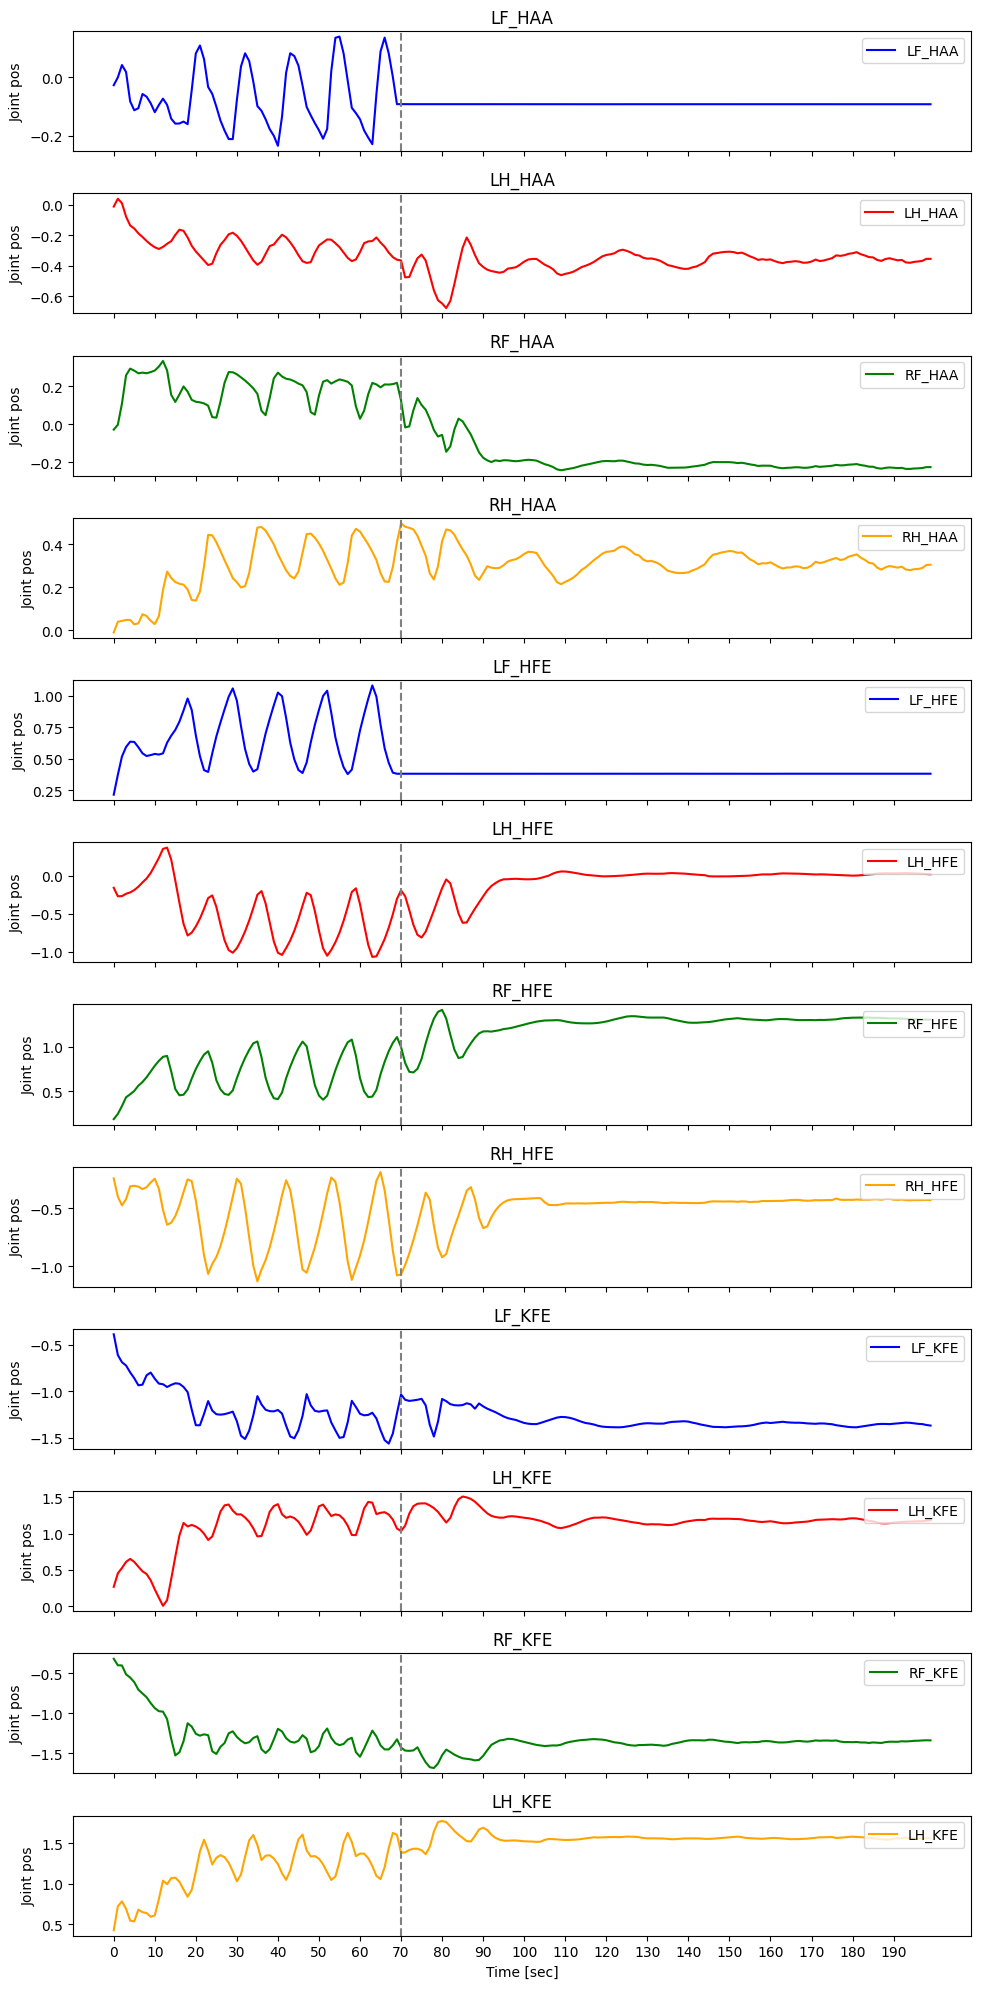

In [ ]:
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-29_00-28-01_data.csv"
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-11-29_18-34-53_data.csv"
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-12-02_00-19-38_data.csv"


path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-10-29_14-13-38/2024-12-02_16-34-53_data.csv"
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_navigation/2024-12-03_00-51-41/2024-12-05_17-28-02_data.csv"


# Load data from CSV
data = pd.read_csv(path)
data = data.iloc[0:200]

# Extract time and force data for each foot
time = data['Time']
joint0_pos = data['joint0_pos']
joint1_pos = data['joint1_pos']
joint2_pos = data['joint2_pos']
joint3_pos = data['joint3_pos']
joint4_pos = data['joint4_pos']
joint5_pos = data['joint5_pos']
joint6_pos = data['joint6_pos']
joint7_pos = data['joint7_pos']
joint8_pos = data['joint8_pos']
joint9_pos = data['joint9_pos']
joint10_pos = data['joint10_pos']
joint11_pos = data['joint11_pos']

# Define colors and labels for each foot
forces = [joint0_pos, joint1_pos, joint2_pos, joint3_pos, joint4_pos, joint5_pos, joint6_pos, joint7_pos, joint8_pos, joint9_pos, joint10_pos, joint11_pos]
labels = ['LF_HAA', 'LH_HAA', 'RF_HAA', 'RH_HAA','LF_HFE','LH_HFE','RF_HFE','RH_HFE','LF_KFE','LH_KFE','RF_KFE','LH_KFE']
colors = ['blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange']


# Define x-ticks with intervals of 10 seconds
time_ticks = np.arange(min(time)-1, max(time)-1, 10)

# Create subplots for each foot
fig, axs = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
    ax.plot(time, force, color=color, label=label)
    ax.set_ylabel("Joint pos")
    ax.set_title(label)
    ax.legend(loc="upper right")

    # Add vertical lines at time = 299, 300, 301
    ax.axvline(x=70, color='gray', linestyle='--', label='Time 300')
    # ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# Set x-axis label only for the bottom subplot
axs[-1].set_xlabel("Time [sec]")

# Set x-ticks every 10 seconds
for ax in axs:
    ax.set_xticks(time_ticks+1)

# Adjust layout
plt.tight_layout()
plt.show()

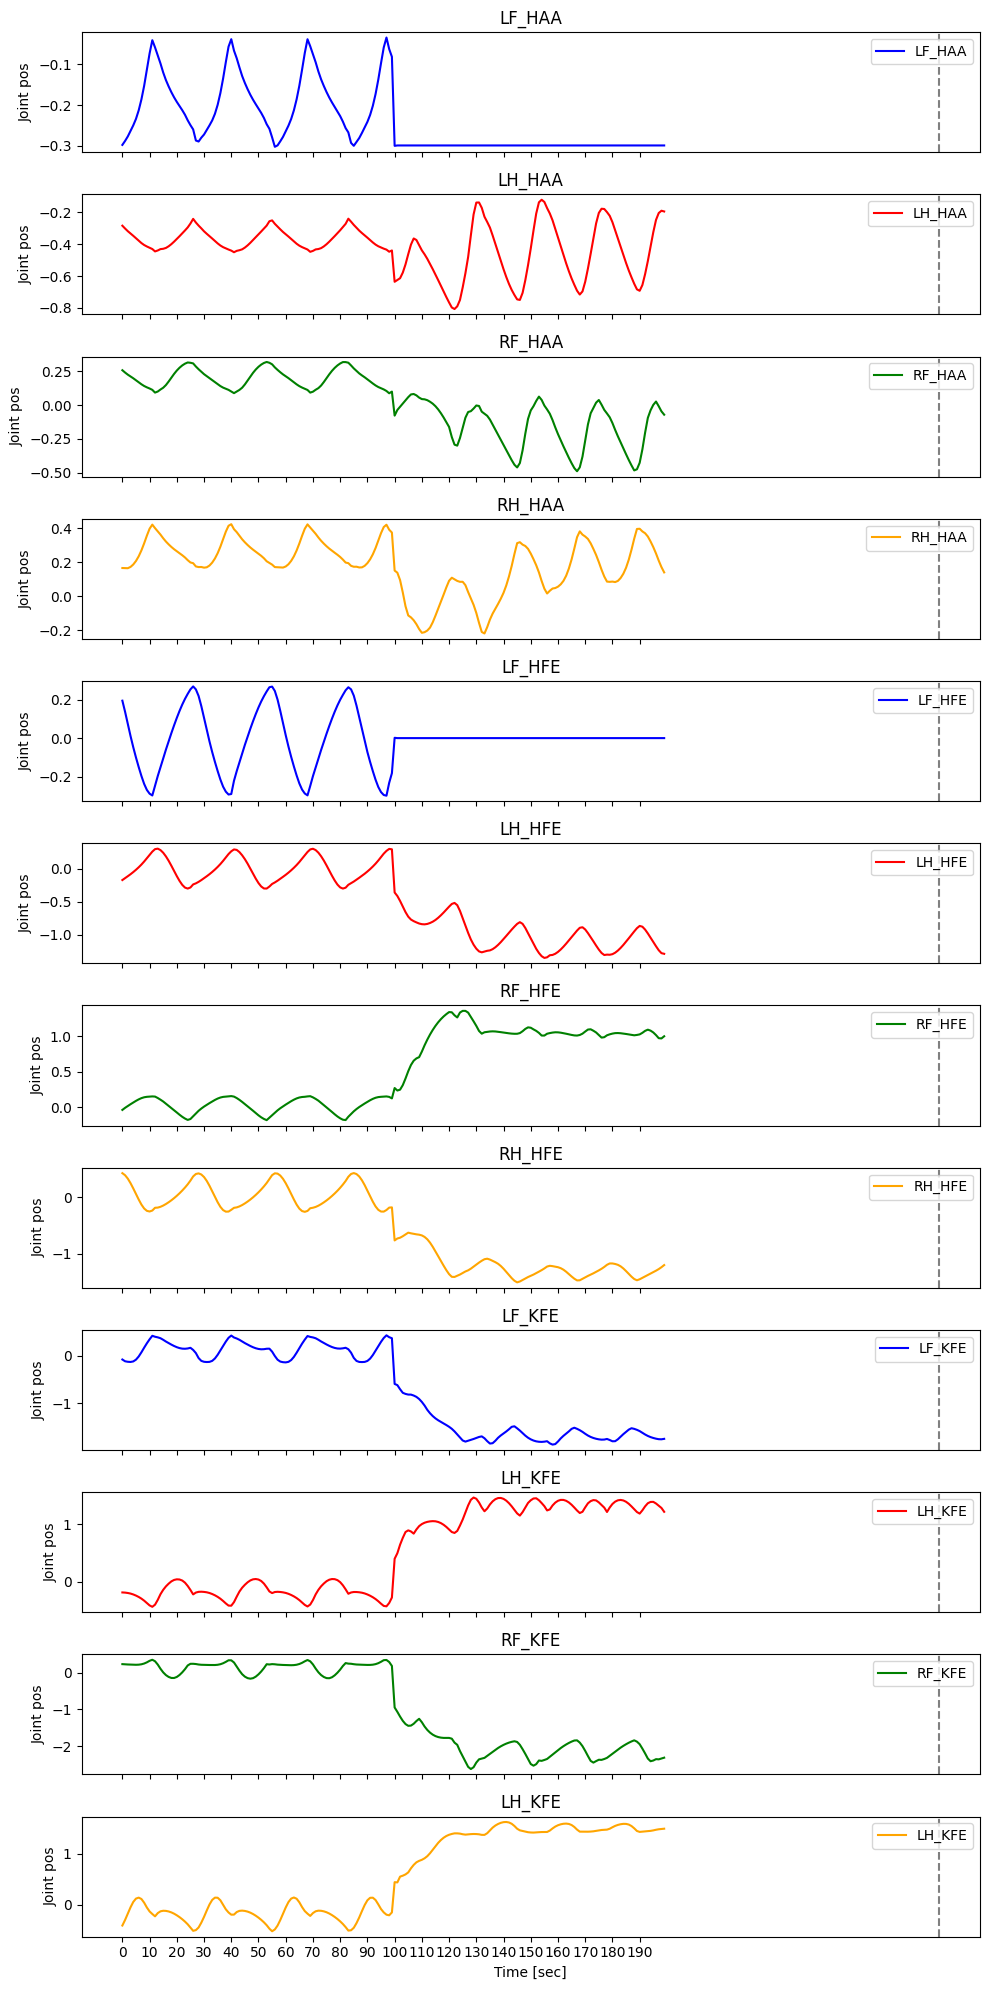

In [ ]:
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-12-02_23-11-51/2024-12-05_15-39-52_data.csv"

import ast 
# Load data from CSV
data = pd.read_csv(path)
data = data.iloc[200:400]

df = pd.DataFrame(data)

# Convert string representation of lists to actual lists
df['obs'] = df['obs'].apply(ast.literal_eval)

# Extract the first element
obs1 = df['obs'].apply(lambda x: x[12])
obs2 = df['obs'].apply(lambda x: x[13])
obs3 = df['obs'].apply(lambda x: x[14])
obs4 = df['obs'].apply(lambda x: x[15])
obs5 = df['obs'].apply(lambda x: x[16])
obs6 = df['obs'].apply(lambda x: x[17])
obs7 = df['obs'].apply(lambda x: x[18])
obs8 = df['obs'].apply(lambda x: x[19])
obs9 = df['obs'].apply(lambda x: x[20])
obs10 = df['obs'].apply(lambda x: x[21])
obs11 = df['obs'].apply(lambda x: x[22])
obs12 = df['obs'].apply(lambda x: x[23])

# Define colors and labels for each foot
forces = [obs1, obs2, obs3, obs4, obs5, obs6, obs7, obs8, obs9, obs10, obs11, obs12]
labels = ['LF_HAA', 'LH_HAA', 'RF_HAA', 'RH_HAA','LF_HFE','LH_HFE','RF_HFE','RH_HFE','LF_KFE','LH_KFE','RF_KFE','LH_KFE']
colors = ['blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange', 'blue', 'red', 'green', 'orange']


# Define x-ticks with intervals of 10 seconds
time_ticks = np.arange(min(time)-1, max(time)-1, 10)

# Create subplots for each foot
fig, axs = plt.subplots(12, 1, figsize=(10, 20), sharex=True)

for i, (ax, force, label, color) in enumerate(zip(axs, forces, labels, colors)):
    ax.plot(time, force, color=color, label=label)
    ax.set_ylabel("Joint pos")
    ax.set_title(label)
    ax.legend(loc="upper right")

    # Add vertical lines at time = 299, 300, 301
    ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')
    # ax.axvline(x=300, color='gray', linestyle='--', label='Time 300')

# Set x-axis label only for the bottom subplot
axs[-1].set_xlabel("Time [sec]")

# Set x-ticks every 10 seconds
for ax in axs:
    ax.set_xticks(time_ticks+1)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-12-02_23-11-51/2024-12-26_01-09-20_data.csv"
data = pd.read_csv(path)
df = pd.DataFrame(data)

print("joint pos 0 :", df["joint0_pos"][0])
print("joint pos 1 :", df["joint1_pos"][0])
print("joint pos 2 :", df["joint2_pos"][0])
print("joint pos 3 :", df["joint3_pos"][0])
print("joint pos 4 :", df["joint4_pos"][0])
print("joint pos 5 :", df["joint5_pos"][0])
print("joint pos 6 :", df["joint6_pos"][0])
print("joint pos 7 :", df["joint7_pos"][0])
print("joint pos 8 :", df["joint8_pos"][0])
print("joint pos 9 :", df["joint9_pos"][0])
print("joint pos 10 :", df["joint10_pos"][0])
print("joint pos 11 :", df["joint11_pos"][0])

joint pos 0 : -0.0264345575124025
joint pos 1 : -0.0292748194187879
joint pos 2 : 0.0305539909750223
joint pos 3 : -0.0047424174845218
joint pos 4 : 0.6649891138076782
joint pos 5 : -0.585308313369751
joint pos 6 : 0.2523644864559173
joint pos 7 : -0.5610500574111938
joint pos 8 : -0.6430094838142395
joint pos 9 : 0.7055535912513733
joint pos 10 : -0.8588570952415466
joint pos 11 : 0.9084296226501464


In [ ]:
path = "/home/napassorn/IsaacLab_ws/Thesis/LegRobot/logs/rsl_rl/anymal_d_flat/2024-12-02_23-11-51/2024-12-26_01-06-41_data.csv"
data = pd.read_csv(path)
df = pd.DataFrame(data)

print("joint pos 0 :", df["joint0_pos"][0])
print("joint pos 1 :", df["joint1_pos"][0])
print("joint pos 2 :", df["joint2_pos"][0])
print("joint pos 3 :", df["joint3_pos"][0])
print("joint pos 4 :", df["joint4_pos"][0])
print("joint pos 5 :", df["joint5_pos"][0])
print("joint pos 6 :", df["joint6_pos"][0])
print("joint pos 7 :", df["joint7_pos"][0])
print("joint pos 8 :", df["joint8_pos"][0])
print("joint pos 9 :", df["joint9_pos"][0])
print("joint pos 10 :", df["joint10_pos"][0])
print("joint pos 11 :", df["joint11_pos"][0])

joint pos 0 : -0.0034074222203344
joint pos 1 : 0.0069812880828976
joint pos 2 : 0.0098771518096327
joint pos 3 : 0.0259817168116569
joint pos 4 : 0.5174905061721802
joint pos 5 : -0.3409804701805115
joint pos 6 : 0.3181702494621277
joint pos 7 : -0.4670895636081695
joint pos 8 : -0.5053733587265015
joint pos 9 : 0.9220646619796752
joint pos 10 : -0.7398587465286255
joint pos 11 : 0.981895923614502
